In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [3]:
df.shape

(5572, 5)

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1698,spam,"Free msg. Sorry, a service you ordered from 81...",NaN,NaN,NaN
1709,ham,U meet other fren dun wan meet me ah... Muz b ...,NaN,NaN,NaN
1242,ham,Nobody can decide where to eat and dad wants C...,NaN,NaN,NaN
4079,ham,"Sir, good morning. Hope you had a good weekend...",NaN,NaN,NaN
5190,spam,Our records indicate u maybe entitled to 5000 ...,NaN,NaN,NaN


## Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace  = True)

In [7]:
df.sample(5)

,v1,v2
3383,spam,FREE MSG:We billed your mobile number by mista...
5168,ham,"IÛ÷ve got some salt, you can rub it in my ope..."
1700,ham,Please ask mummy to call father
5198,ham,She.s fine. I have had difficulties with her p...
3529,ham,Tyler (getting an 8th) has to leave not long a...


In [8]:
# renaming the columns
df.rename(columns={"v1":"target","v2":"text"},inplace = True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])


In [11]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep = "first")

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

In [16]:
# EDA

In [17]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1852bdad5b0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

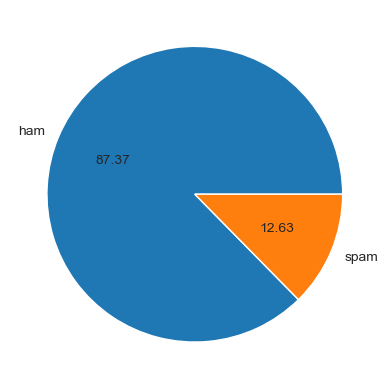

In [19]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct = "%0.2f")

In [20]:
# data is imbalanced
import nltk

In [21]:
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df["num_characters"] = df["text"].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df["text"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [25]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()


,target,text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [28]:
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [30]:
df[["num_characters","num_sentences","num_words"]].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
num_sentences,5169.0,1.965564,1.448541,1.0,1.0,1.0,2.0,38.0
num_words,5169.0,18.455794,13.324758,1.0,9.0,15.0,26.0,220.0


In [31]:
df[df["target"]==0][["num_characters","num_sentences","num_words"]].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
num_sentences,4516.0,1.820195,1.383657,1.0,1.0,1.0,2.0,38.0
num_words,4516.0,17.123782,13.493970,1.0,8.0,13.0,22.0,220.0


In [32]:
df[df["target"]==1][["num_characters","num_sentences","num_words"]].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
num_sentences,653.0,2.970904,1.488425,1.0,2.0,3.0,4.0,9.0
num_words,653.0,27.667688,7.008418,2.0,25.0,29.0,32.0,46.0


<Axes: xlabel='num_characters', ylabel='Count'>

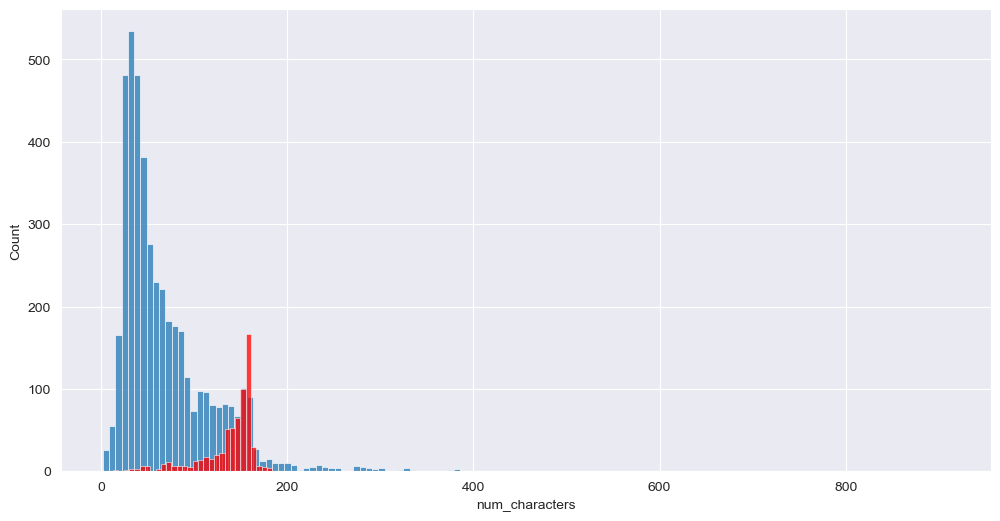

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color = "red")


<Axes: xlabel='num_words', ylabel='Count'>

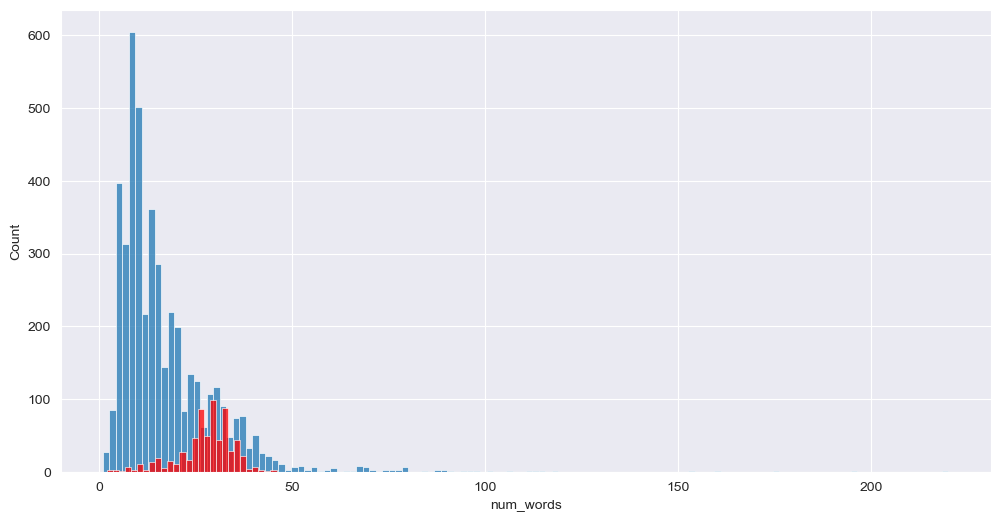

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color = "red")


<Axes: xlabel='num_sentences', ylabel='Count'>

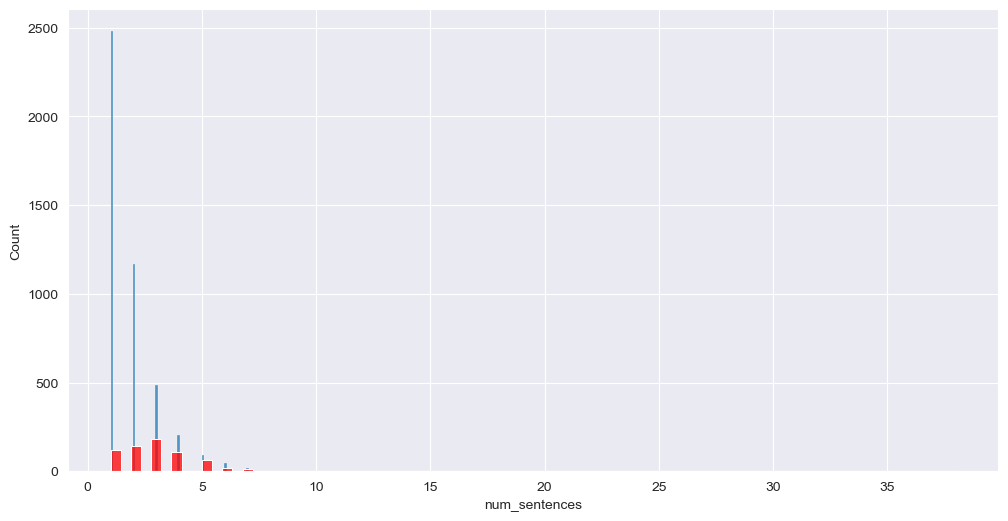

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"],color = "red")


In [ ]:
# data preprocessing

In [39]:
def transform_test(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    


In [40]:
from nltk.corpus import stopwords
#stopwords.words("english")

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
df["transformed_text"] = df["text"].apply(transform_test)

In [44]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = "white")

In [45]:
spam_wc = wc.generate(df[df["target"] == 1]["text"].str.cat(sep=" "))

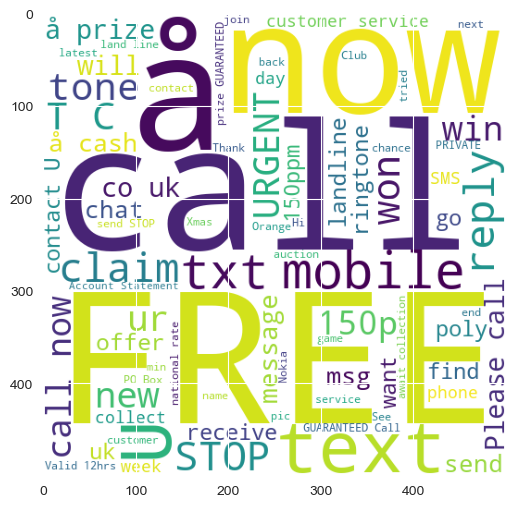

In [46]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)

In [47]:
spam_wc = wc.generate(df[df["target"] == 0]["text"].str.cat(sep=" "))

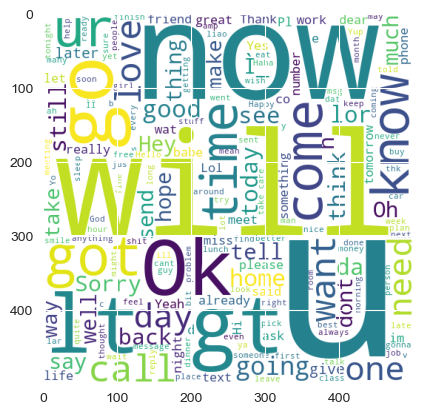

In [48]:
plt.imshow(spam_wc)

In [49]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [50]:
len(spam_corpus)

9939

In [52]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


C:\Users\HP\AppData\Local\Temp\ipykernel_18980\1635354258.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, x='count', y='word', palette='viridis')


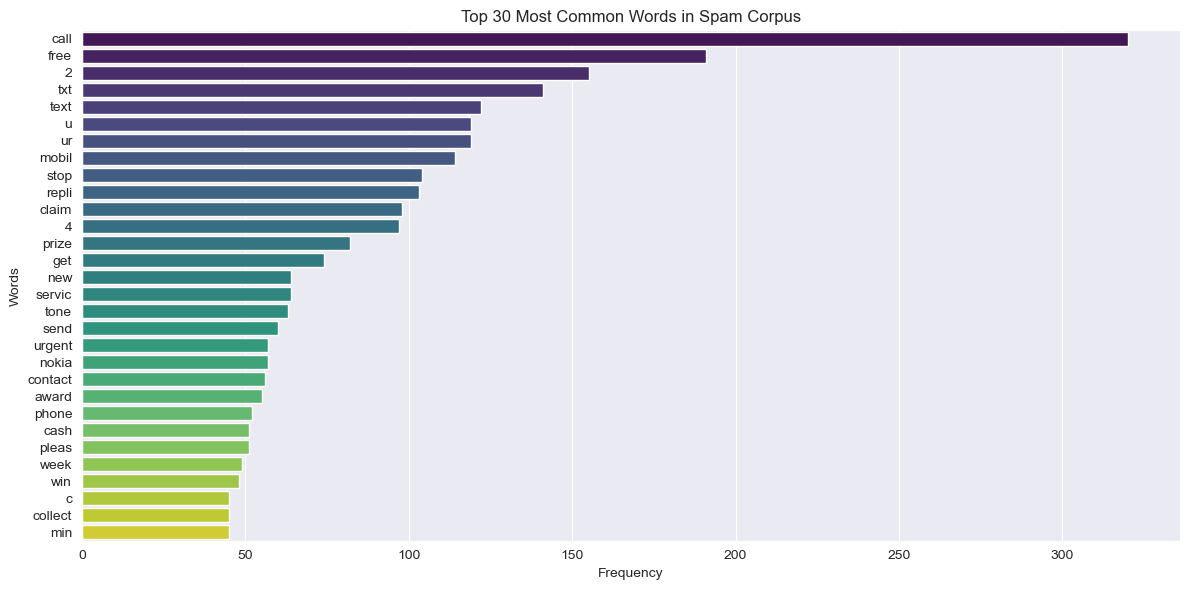

In [53]:
from collections import Counter
top_words = Counter(spam_corpus).most_common(30)
df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_words, x='count', y='word', palette='viridis')
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()



In [54]:
ham_corpus = []
for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [55]:
len(ham_corpus)

35404

C:\Users\HP\AppData\Local\Temp\ipykernel_18980\2397102469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, x='ham_count', y='ham_word', palette='viridis')


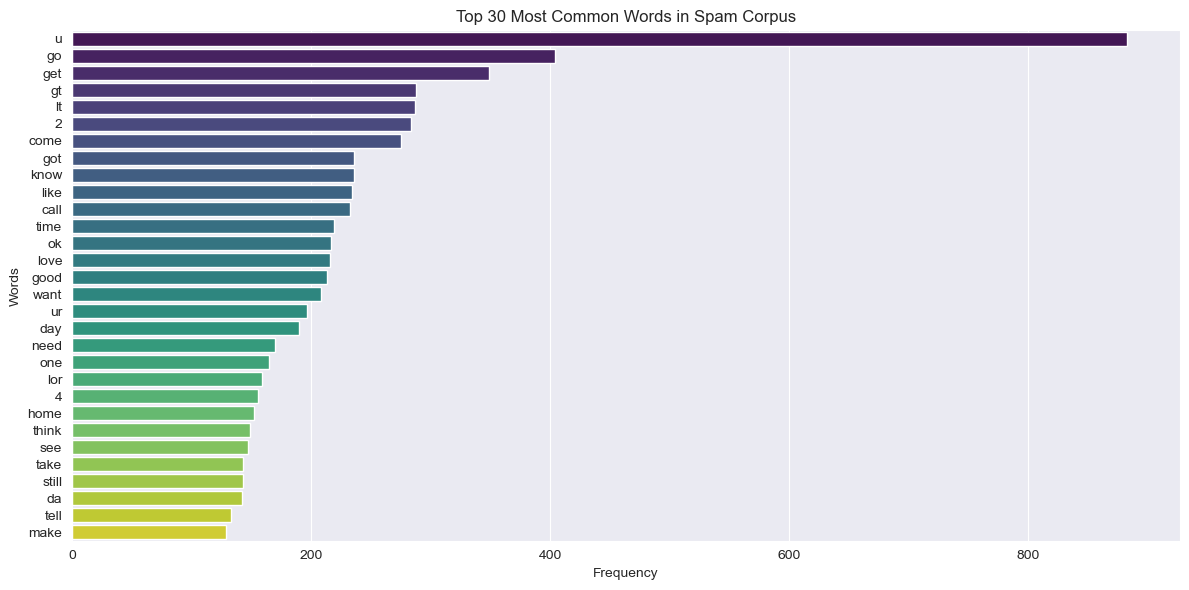

In [56]:
from collections import Counter
top_words = Counter(ham_corpus).most_common(30)
df_top_words = pd.DataFrame(top_words, columns=['ham_word', 'ham_count'])
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_words, x='ham_count', y='ham_word', palette='viridis')
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


In [57]:
# model building

In [58]:
# vectorize
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [59]:
x = cv.fit_transform(df["transformed_text"]).toarray()

In [60]:
x.shape

(5169, 6708)

In [61]:
y = df["target"].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [68]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [69]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [71]:
x1 = tfidf.fit_transform(df["transformed_text"]).toarray()

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state = 2)

In [73]:
gnb.fit(x_train,y_train)
y_pred11 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred11))
print(confusion_matrix(y_test,y_pred11))
print(precision_score(y_test,y_pred11))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [74]:
mnb.fit(x_train,y_train)
y_pred21 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred21))
print(confusion_matrix(y_test,y_pred21))
print(precision_score(y_test,y_pred21))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [75]:
bnb.fit(x_train,y_train)
y_pred31 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred31))
print(confusion_matrix(y_test,y_pred31))
print(precision_score(y_test,y_pred31))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [77]:
import pickle
pickle.dump(tfidf,open("vectorize.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))


In [78]:
import os
print(os.listdir())


['.idea', 'email_spam_classifier.ipynb', 'model.pkl', 'spam.csv', 'vectorize.pkl']
